<a href="https://colab.research.google.com/github/Listin4ever/Audio-Sentiment-Analysis/blob/main/emotional_speech_recognition_audio_process_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # PACKAGES AND LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install pydub
!pip3 install catboost
!pip install  jax
!pip install keras
!pip install tensorflow

In [3]:
pip install --upgrade tensorflow

In [4]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

> # PATH, LABEL, TRANSFORMATION

#### MAIN

In [5]:
Main_WAV_Path = Path("/content/drive/MyDrive/Data/TESS Toronto emotional speech set data")

#### WAV PATH

In [6]:
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))

#### WAV LABELS

In [7]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wav_Path))

#### TO SERIES

In [8]:
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")

#### TO DATAFRAME

In [9]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [10]:
print(Main_Wav_Data.head(-1))

                                                    WAV    EMOTION
0     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
1     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
2     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
3     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
4     /content/drive/MyDrive/Data/TESS Toronto emoti...  YAF_happy
...                                                 ...        ...
5604  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry
5605  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry
5606  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry
5607  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry
5608  /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_angry

[5609 rows x 2 columns]


In [11]:
print(Main_Wav_Data["EMOTION"].value_counts())

OAF_angry                 410
YAF_happy                 400
YAF_pleasant_surprised    400
YAF_disgust               400
YAF_sad                   400
YAF_neutral               400
YAF_fear                  400
OAF_neutral               400
OAF_Sad                   400
OAF_Pleasant_surprise     400
YAF_angry                 400
OAF_Fear                  400
OAF_disgust               400
OAF_happy                 400
Name: EMOTION, dtype: int64


#### TO SHUFFLE

In [12]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

In [13]:
print(Main_Wav_Data.head(-1))

                                                    WAV                EMOTION
0     /content/drive/MyDrive/Data/TESS Toronto emoti...            YAF_neutral
1     /content/drive/MyDrive/Data/TESS Toronto emoti...               YAF_fear
2     /content/drive/MyDrive/Data/TESS Toronto emoti...            OAF_disgust
3     /content/drive/MyDrive/Data/TESS Toronto emoti...              OAF_angry
4     /content/drive/MyDrive/Data/TESS Toronto emoti...  OAF_Pleasant_surprise
...                                                 ...                    ...
5604  /content/drive/MyDrive/Data/TESS Toronto emoti...              YAF_happy
5605  /content/drive/MyDrive/Data/TESS Toronto emoti...              YAF_happy
5606  /content/drive/MyDrive/Data/TESS Toronto emoti...               YAF_fear
5607  /content/drive/MyDrive/Data/TESS Toronto emoti...              YAF_happy
5608  /content/drive/MyDrive/Data/TESS Toronto emoti...              YAF_angry

[5609 rows x 2 columns]


> # DATA PROCESS FUNCTIONS

#### NOISE

In [14]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])

    return data

#### STRETCH

In [15]:
def stretch_process(data,rate=0.8):

    return librosa.effects.time_stretch(data,rate=rate)

#### SHIFT

In [16]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5,high=5) * 1000)

    return np.roll(data,shift_range)

#### PITCH

In [44]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):

    return librosa.effects.pitch_shift(data,sr= sampling_rate,n_steps= pitch_factor)

#### EXTRACT FEATURES

In [18]:
def extract_process(data):

    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))

    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))

    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))

    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))

    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))

    return output_result

#### EXPORT FEATURES

In [19]:
def export_process(path):

    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)

    output_1 = extract_process(data)
    result = np.array(output_1)

    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result,output_2))

    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch)
    result = np.vstack((result,output_3))

    return result

> # ANALYSIS

#### HEARING

In [20]:
rate,speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech,rate=rate,autoplay=False)

YAF_neutral


In [21]:
rate,speech = read(Main_Wav_Data["WAV"][3])
print(Main_Wav_Data["EMOTION"][3])

Audio(speech,rate=rate,autoplay=False)

OAF_angry


In [22]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])

Audio(speech,rate=rate,autoplay=False)

OAF_Sad


#### SHAPE - TYPE

In [23]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_Sad
(56976,)
int16
24414


In [24]:
rate,speech = read(Main_Wav_Data["WAV"][314])
print(Main_Wav_Data["EMOTION"][314])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_happy
(49071,)
int16
24414


In [25]:
rate,speech = read(Main_Wav_Data["WAV"][134])
print(Main_Wav_Data["EMOTION"][134])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_angry
(39818,)
int16
24414


#### WAVEPLOT

In [26]:
!pip install --upgrade librosa

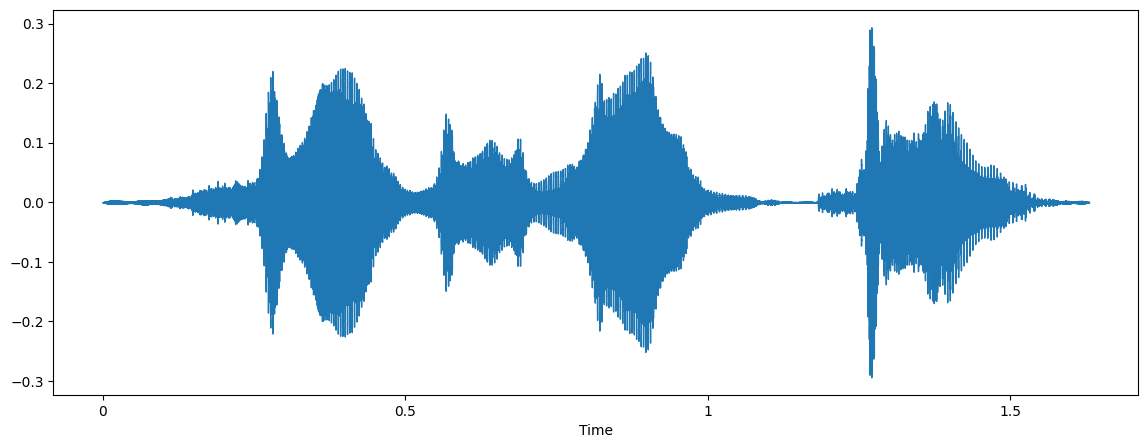

In [27]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][134])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

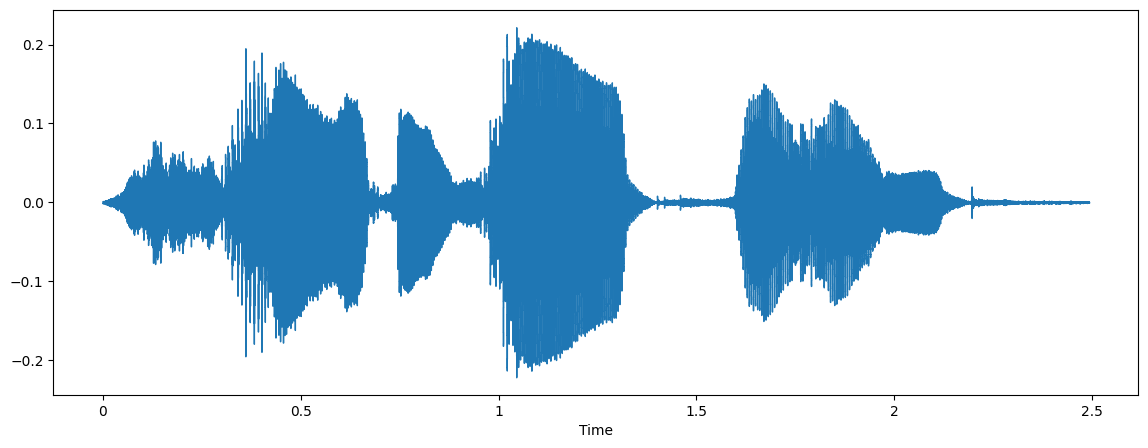

In [28]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][34])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

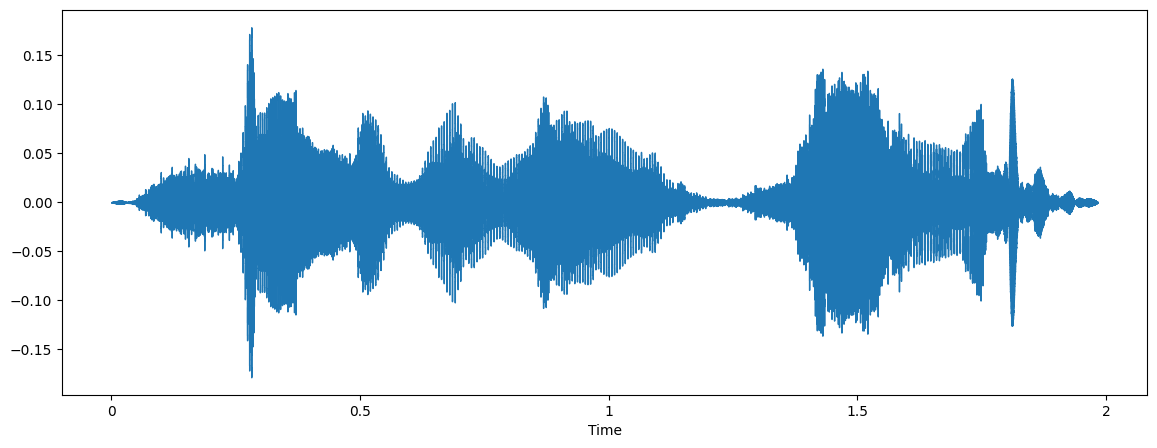

In [29]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

#### SPECSHOW

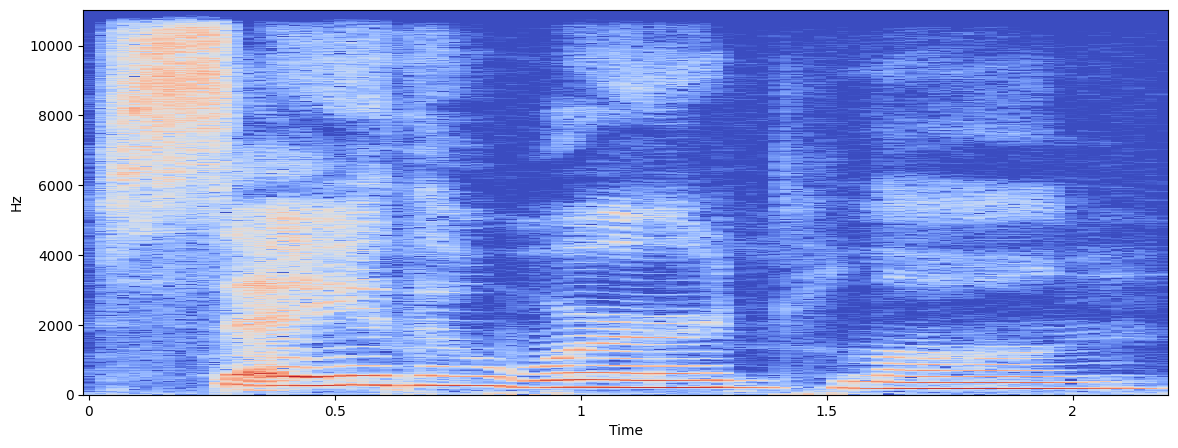

In [30]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][458])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

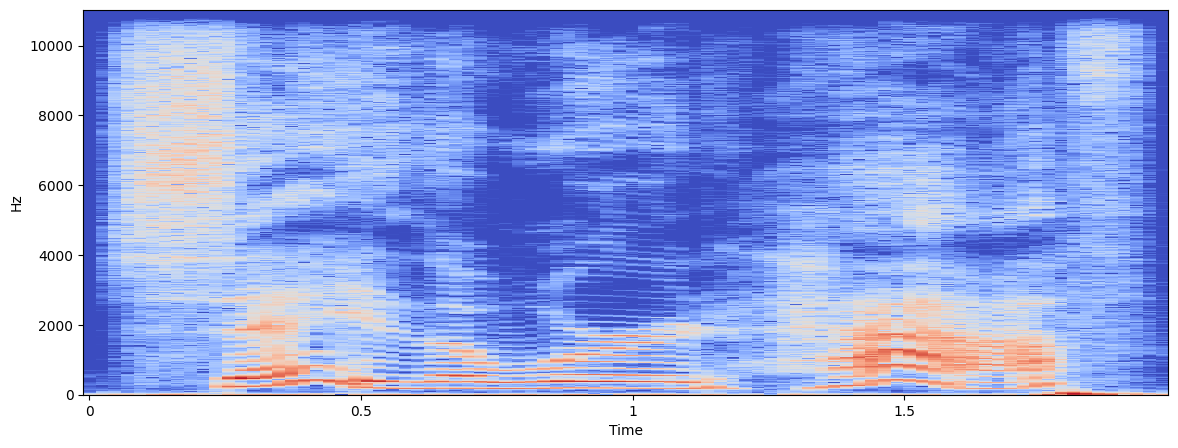

In [31]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

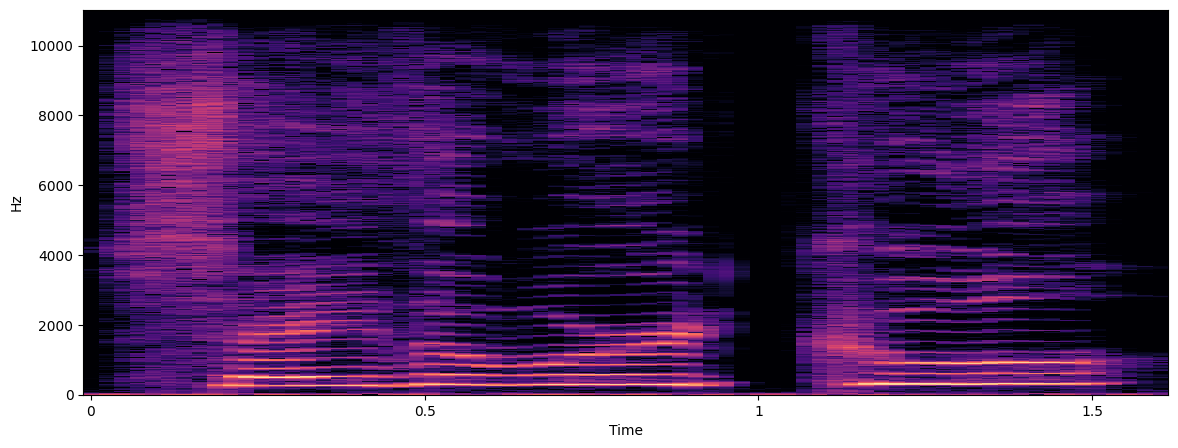

In [32]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

#### NOISE

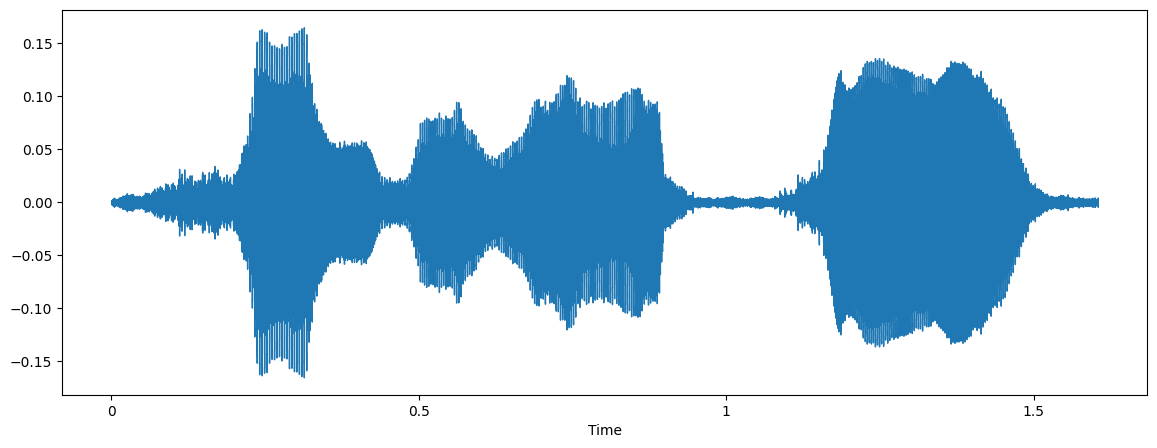

In [33]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveshow(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

#### STRETCHING

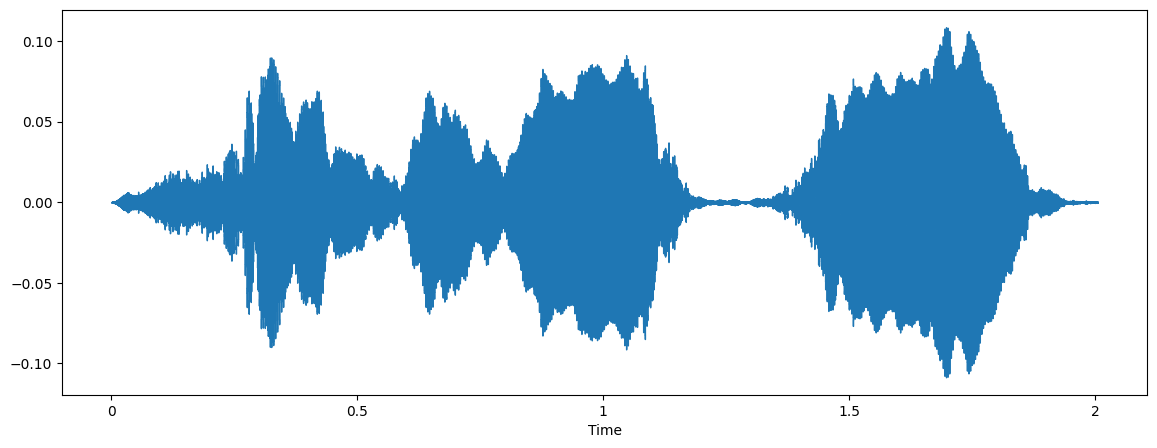

In [34]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveshow(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

#### SHIFTING

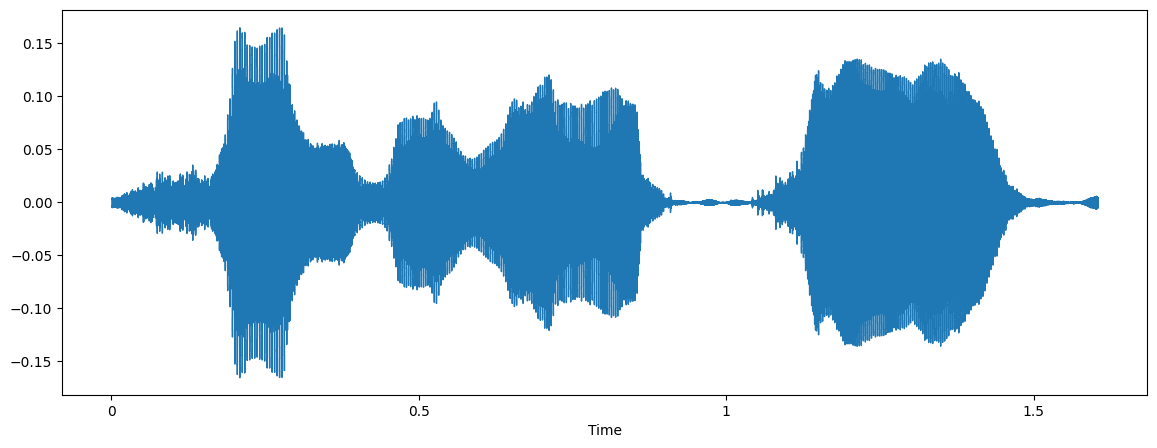

In [35]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveshow(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

#### PITCH

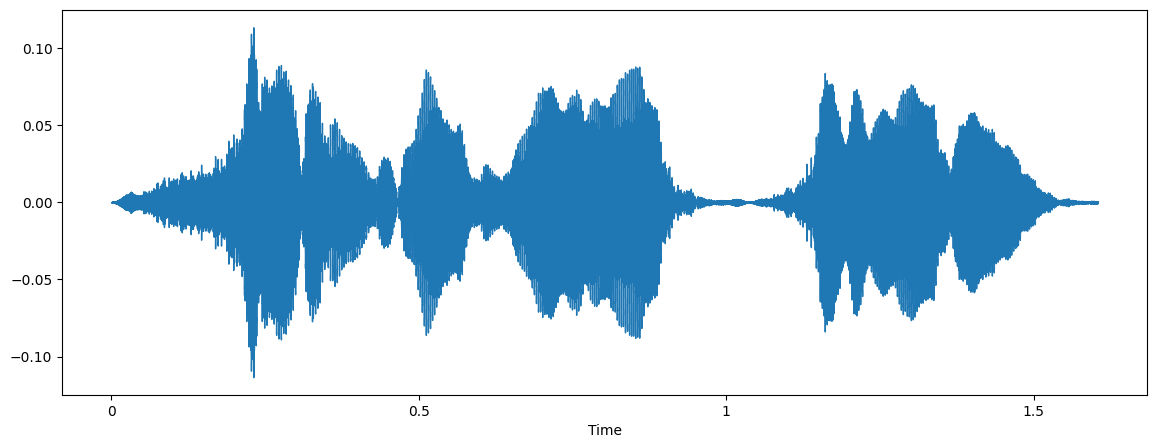

In [45]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

pitch_audio = pitch_process(audio_speech,sample_rate)
librosa.display.waveshow(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

#### SAME TIMEFRAME PERIOD

(26565,)


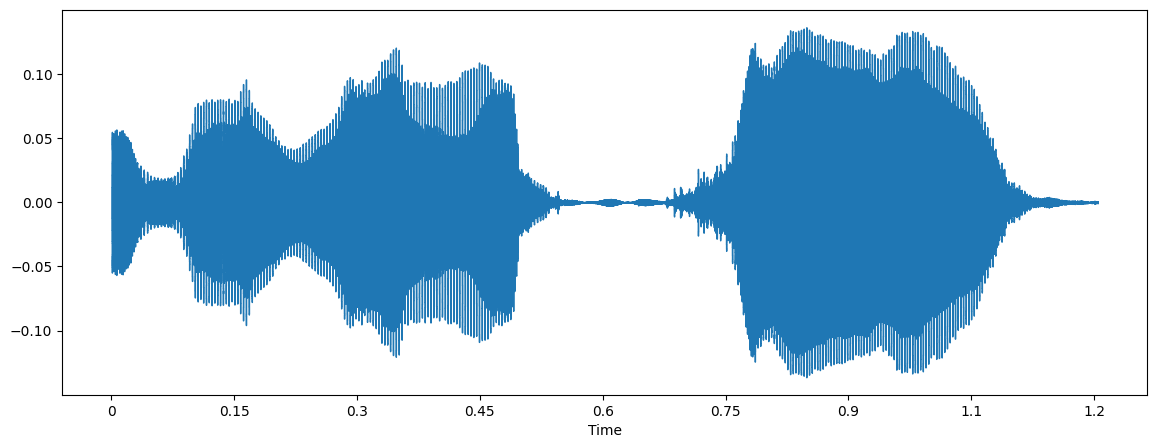

In [46]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000],duration=2.5,offset=0.4)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(23325,)


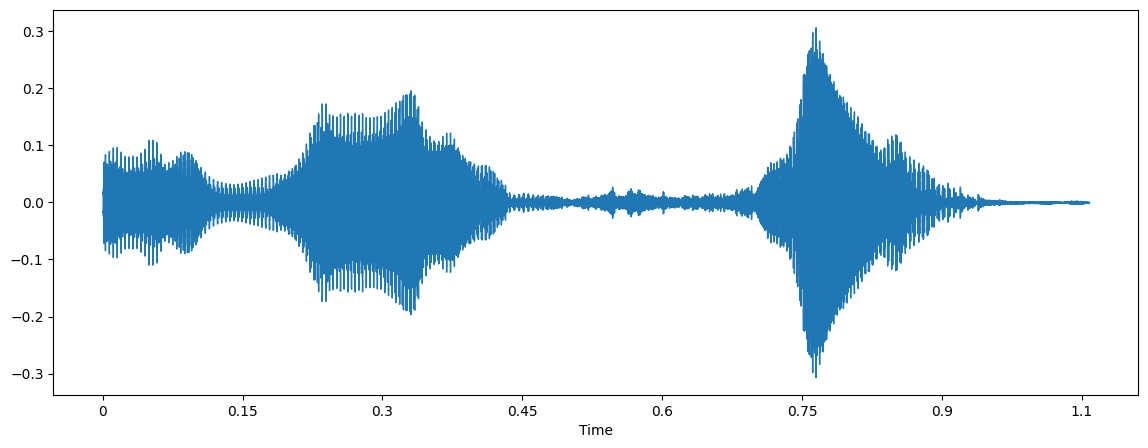

In [47]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][3],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(38644,)


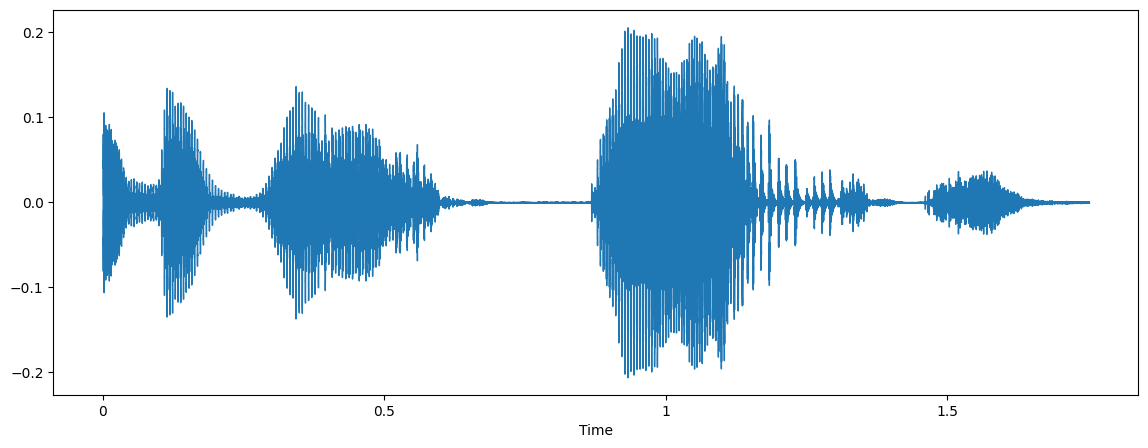

In [48]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][1398],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

> # DATA PROCESS AND ENGINEERING

#### TRANSFORMATION AND EXPORTATION

In [49]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):

    features = export_process(path)

    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

In [50]:
print(len(x_Train))
print(len(y_Train))
print(len(Main_Wav_Data.WAV))

16830
16830
5610


In [51]:
print(x_Train[0].shape)

(162,)


In [52]:
print(y_Train[0:5])

['YAF_neutral', 'YAF_neutral', 'YAF_neutral', 'YAF_fear', 'YAF_fear']


In [53]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [54]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.080299,0.454036,0.736372,0.496145,0.360060,0.407525,0.516674,0.849730,0.580664,0.401834,...,0.000039,0.000037,0.000041,0.000043,0.000088,0.000099,0.000056,0.000024,2.306047e-06,YAF_neutral
1,0.160125,0.486063,0.765762,0.537414,0.405079,0.450777,0.526326,0.861299,0.613229,0.440669,...,0.000128,0.000117,0.000119,0.000127,0.000173,0.000181,0.000141,0.000103,8.305700e-05,YAF_neutral
2,0.079590,0.385436,0.422453,0.682224,0.531302,0.316887,0.360678,0.456650,0.833080,0.666581,...,0.000032,0.000013,0.000010,0.000009,0.000010,0.000015,0.000022,0.000012,6.962473e-07,YAF_neutral
3,0.092029,0.536367,0.297802,0.322776,0.322022,0.385301,0.641061,0.474071,0.366924,0.238755,...,0.000941,0.001173,0.001167,0.001158,0.001352,0.000816,0.000242,0.000089,1.137327e-05,YAF_fear
4,0.117834,0.559303,0.337194,0.379248,0.383880,0.437186,0.665560,0.495188,0.388877,0.262929,...,0.002863,0.003089,0.003050,0.002986,0.003229,0.002662,0.002118,0.001954,1.735125e-03,YAF_fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16824,0.187037,0.579481,0.566019,0.579502,0.473286,0.489573,0.571231,0.465885,0.405806,0.464943,...,0.000795,0.000580,0.000545,0.000488,0.000501,0.000319,0.000344,0.000192,2.285914e-05,YAF_angry
16825,0.234958,0.583149,0.606279,0.598888,0.523648,0.600785,0.628935,0.463367,0.481681,0.520566,...,0.001132,0.000929,0.000871,0.000819,0.000837,0.000662,0.000682,0.000548,3.774524e-04,YAF_angry
16826,0.188924,0.624113,0.539403,0.559510,0.467208,0.398050,0.551358,0.514015,0.366842,0.428667,...,0.000331,0.000255,0.000154,0.000127,0.000107,0.000103,0.000103,0.000049,3.494315e-06,YAF_angry
16827,0.066305,0.401642,0.357809,0.429564,0.359785,0.292904,0.380280,0.409512,0.321802,0.369658,...,0.005112,0.002923,0.002329,0.002185,0.002389,0.001089,0.000669,0.000349,2.951191e-05,YAF_angry


In [55]:
print(New_Features_Wav["EMOTIONS"].value_counts())

OAF_angry                 1230
YAF_neutral               1200
YAF_fear                  1200
OAF_disgust               1200
OAF_Pleasant_surprise     1200
YAF_disgust               1200
YAF_angry                 1200
OAF_neutral               1200
OAF_Sad                   1200
YAF_happy                 1200
YAF_sad                   1200
OAF_happy                 1200
YAF_pleasant_surprised    1200
OAF_Fear                  1200
Name: EMOTIONS, dtype: int64


#### SPLITTING

In [56]:
encoder_label = OneHotEncoder()

In [57]:
scaler_data = StandardScaler()

In [58]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [59]:
print(X.shape)
print(Y.shape)

(16830, 162)
(16830,)


In [60]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [61]:
print(Y.shape)

(16830, 14)


In [62]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [63]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(15147, 162)
(15147, 14)
(1683, 162)
(1683, 14)


In [64]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)

In [65]:
print(xTrain.shape)
print(xTest.shape)

(15147, 162)
(1683, 162)


In [66]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

In [67]:
print(xTrain.shape)
print(xTest.shape)

(15147, 162, 1)
(1683, 162, 1)


# MODEL STRUCTURE

In [68]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(xTrain.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=14, activation='softmax'))

In [69]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [70]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [71]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=50, validation_data=(xTest, yTest), callbacks=[early_stop])

Epoch 1/50
237/237 [==============================] - 102s 424ms/step - loss: 1.5187 - accuracy: 0.4702 - val_loss: 0.5107 - val_accuracy: 0.8253
Epoch 2/50
237/237 [==============================] - 104s 440ms/step - loss: 0.6172 - accuracy: 0.7775 - val_loss: 0.2595 - val_accuracy: 0.9144
Epoch 3/50
237/237 [==============================] - 100s 421ms/step - loss: 0.3894 - accuracy: 0.8625 - val_loss: 0.1408 - val_accuracy: 0.9483
Epoch 4/50
237/237 [==============================] - 103s 434ms/step - loss: 0.2944 - accuracy: 0.9012 - val_loss: 0.0978 - val_accuracy: 0.9667
Epoch 5/50
237/237 [==============================] - 100s 422ms/step - loss: 0.2080 - accuracy: 0.9299 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 6/50
237/237 [==============================] - 102s 431ms/step - loss: 0.1631 - accuracy: 0.9424 - val_loss: 0.0697 - val_accuracy: 0.9727
Epoch 7/50
237/237 [==============================] - 99s 417ms/step - loss: 0.1289 - accuracy: 0.9569 - val_loss: 0.0371 - 

<Axes: >

<Figure size 1000x1000 with 0 Axes>

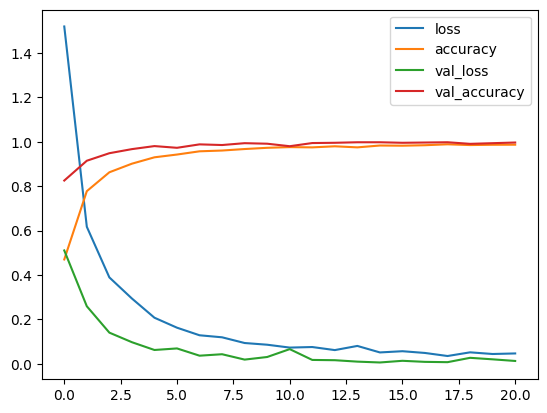

In [72]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

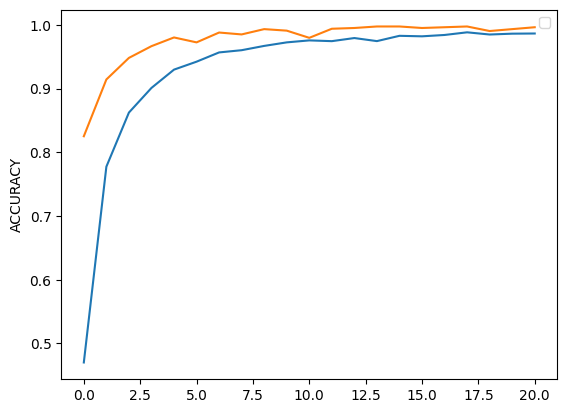

In [73]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

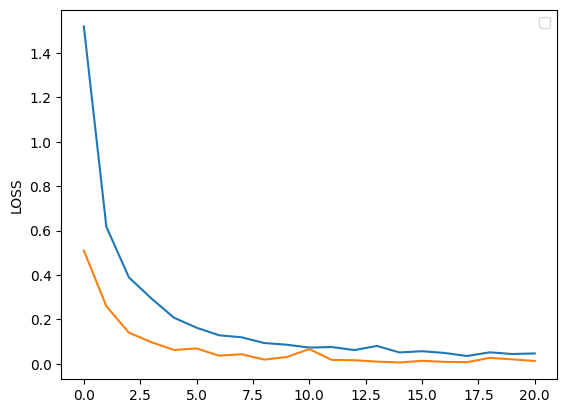

In [74]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

#### PREDICTION

In [75]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

53/53 [==============================] - 3s 49ms/step - loss: 0.0133 - accuracy: 0.9964
LOSS:  0.0133
ACCURACY:  0.9964


In [76]:
prediction_test = Model.predict(xTest)
y_prediction = encoder_label.inverse_transform(prediction_test)

yTest = encoder_label.inverse_transform(yTest)

53/53 [==============================] - 2s 43ms/step


In [77]:
print(prediction_test[0:10])

[[2.10254164e-13 4.09116983e-05 1.55299347e-08 1.13580156e-09
  9.99958932e-01 5.78907233e-09 1.76505945e-12 1.17829855e-14
  1.34018061e-10 2.75375182e-13 3.47620469e-17 2.50259654e-15
  1.76008854e-07 2.19816720e-10]
 [1.26475213e-27 4.97731076e-28 1.09194859e-21 0.00000000e+00
  1.61606977e-27 0.00000000e+00 9.99999940e-01 0.00000000e+00
  0.00000000e+00 3.92236510e-31 0.00000000e+00 2.65844425e-15
  1.26251035e-35 0.00000000e+00]
 [4.77927681e-22 2.79543472e-24 8.15937871e-20 3.22636896e-35
  3.47268006e-22 0.00000000e+00 9.99999940e-01 0.00000000e+00
  0.00000000e+00 3.29096740e-29 6.24427609e-37 6.48629457e-12
  5.88120285e-33 0.00000000e+00]
 [4.94230890e-28 7.85258901e-17 1.73652966e-20 2.65359370e-28
  1.78954831e-21 7.07258483e-23 3.15634927e-26 8.92241955e-13
  6.00700083e-17 5.52524197e-16 6.59150198e-28 3.50717813e-27
  9.99999940e-01 7.48203847e-21]
 [5.24407486e-19 2.05716824e-12 9.99737024e-01 2.71191986e-10
  2.63020076e-04 1.11248222e-16 8.12751533e-11 1.67798319e-17


In [78]:
print(y_prediction[0:10])

[['OAF_disgust']
 ['OAF_neutral']
 ['OAF_neutral']
 ['YAF_pleasant_surprised']
 ['OAF_Sad']
 ['OAF_angry']
 ['YAF_neutral']
 ['YAF_pleasant_surprised']
 ['OAF_neutral']
 ['OAF_Fear']]


In [79]:
print(yTest[0:10])

[['OAF_disgust']
 ['OAF_neutral']
 ['OAF_neutral']
 ['YAF_pleasant_surprised']
 ['OAF_Sad']
 ['OAF_disgust']
 ['YAF_neutral']
 ['YAF_pleasant_surprised']
 ['OAF_neutral']
 ['OAF_Fear']]


In [80]:
conf_matrix = confusion_matrix(yTest, y_prediction)

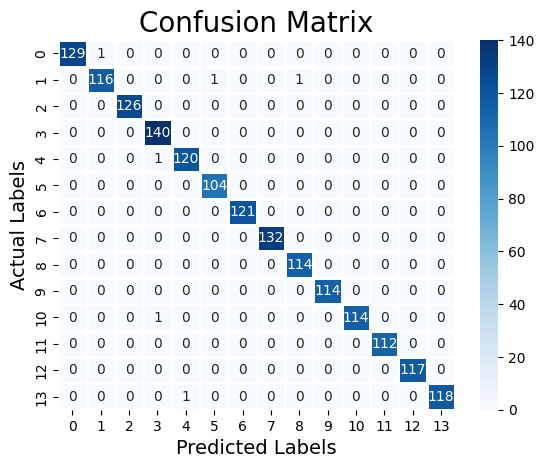

In [81]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [82]:
print(classification_report(yTest, y_prediction))

                        precision    recall  f1-score   support

              OAF_Fear       1.00      0.99      1.00       130
 OAF_Pleasant_surprise       0.99      0.98      0.99       118
               OAF_Sad       1.00      1.00      1.00       126
             OAF_angry       0.99      1.00      0.99       140
           OAF_disgust       0.99      0.99      0.99       121
             OAF_happy       0.99      1.00      1.00       104
           OAF_neutral       1.00      1.00      1.00       121
             YAF_angry       1.00      1.00      1.00       132
           YAF_disgust       0.99      1.00      1.00       114
              YAF_fear       1.00      1.00      1.00       114
             YAF_happy       1.00      0.99      1.00       115
           YAF_neutral       1.00      1.00      1.00       112
YAF_pleasant_surprised       1.00      1.00      1.00       117
               YAF_sad       1.00      0.99      1.00       119

              accuracy                

In [83]:
print(accuracy_score(yTest, y_prediction))

0.9964349376114082


#### SPECIAL PREDICTION

In [85]:
new_predict_list = []
feat_new = export_process("/content/drive/MyDrive/Data/Data for audio sentiment/TRAIN/10.wav")

for feat in feat_new:
    new_predict_list.append(feat)

In [86]:
print(new_predict_list[0].shape)

(162,)


In [87]:
New_Predict_Feat = pd.DataFrame(new_predict_list)

In [88]:
New_Predict_Feat = scaler_data.fit_transform(New_Predict_Feat)
New_Predict_Feat = np.expand_dims(New_Predict_Feat,axis=2)

In [89]:
print(New_Predict_Feat.shape)

(3, 162, 1)


In [90]:
prediction_nonseen = Model.predict(New_Predict_Feat)
arg_prediction_nonseen = prediction_nonseen.argmax(axis=-1)
y_prediction_nonseen = encoder_label.inverse_transform(prediction_nonseen)


1/1 [==============================] - 0s 74ms/step


In [91]:
print(arg_prediction_nonseen)
print(y_prediction_nonseen)

[12  7  5]
[['YAF_pleasant_surprised']
 ['YAF_angry']
 ['OAF_happy']]
